<div align="right" style="text-align: right"><i>Peter Norvig, Oct 2017<br>Data updated monthly</i></div>

# Bicycling Statistics

During a pandemic, bicycling is a great way to (1) spend some time, (2) get some exercise, (3) stay far enough away from others to be safe, and (4) generate some data to analyze. This notebook does the analysis on three types of data:
- **rides**: a random sampling of my 20+ mile rides, and all my 60+ mile rides (from [Strava](https://www.strava.com/athletes/575579)). 
- **segments**: short sections of a mile or so long, chosen to have a variety of steepness  (from [Strava](https://www.strava.com/athletes/575579)). 
- **places**: percentages of  the roads that I have ridden in each town, city, county, etc. (from [Wandrer.earth](https://wandrer.earth/athletes/3534/)). 

This notebook is mostly for my own benefit, but if you're a cyclist you're welcome to adapt it to your data, and if you're a data scientist, you might find it an interesting example of exploratory data analysis.

# Wandering Places

The website [**Wandrer.earth**](https://wandrer.earth) tracks the  distinct roads a user has biked on. It provides a fun incentive to get out and explore new roads. The site is gamified in a way that the biggest rewards are for first reaching 25% of the road-miles in each place (city or neighborhood), and then 90%.  (You get no credit for repeating a road you've already been on.)

For the most part, your scores can only go up, as you cover more roads over time. But the [underlying map](https://www.openstreetmap.org/) is periodically updated, and sometimes a big city (like San Francisco) is split into neighborhoods (like Sunset, Mission, and Presidio); sometimes  unincorporated areas (like Sequoia Tract) are introduced; sometimes boundaries change (e.g. Emerald Lake Hills doubled in road miles in the 2020-11 update, causing my percentage to drop).  

The wandrer.earth site does a great job of showing my current status in all the places I've been, but I wanted to track my progress month-by-month, so I created the charts below.

The legend `"94% ( 52/ 56 mi) 2.7 to 99% Atherton"` means that I have ridden 52 of the 56 miles of roads (or 94%) in Atherton, and I need another 2.7 miles to reach the bonus scoring milestone of 99%. The companion notebook [**BikeCode.ipynb**](BikeCode.ipynb) has the implementation details.

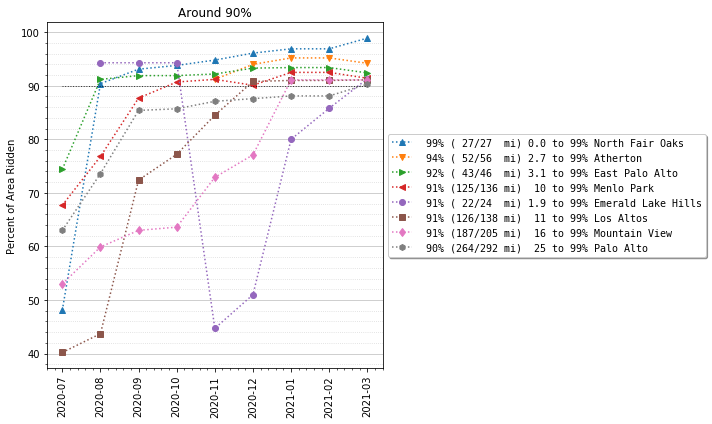

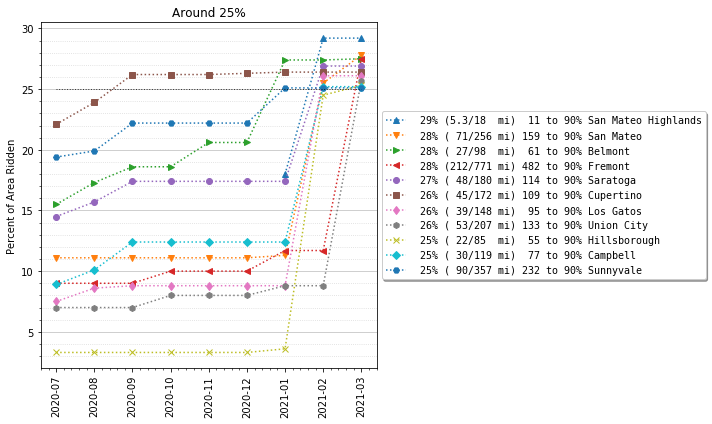

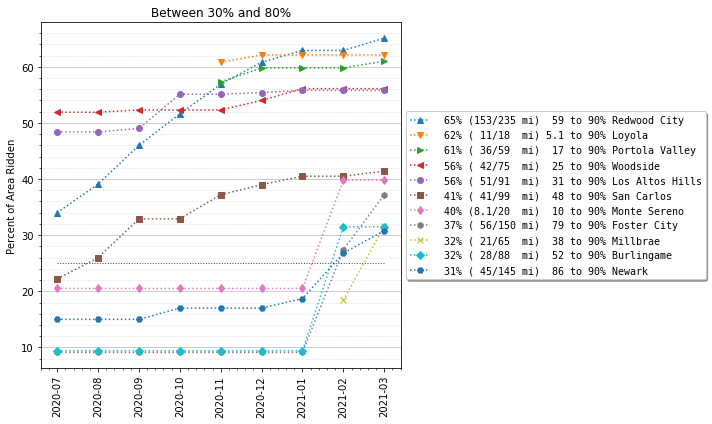

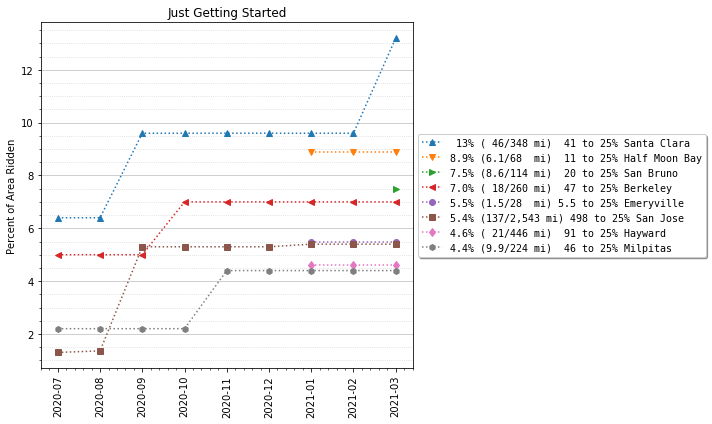

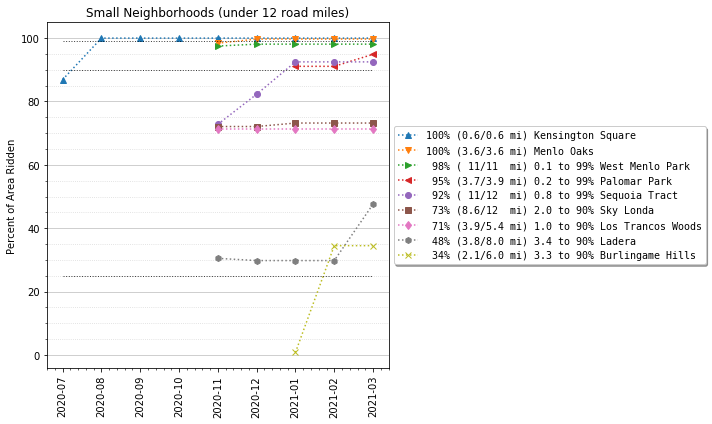

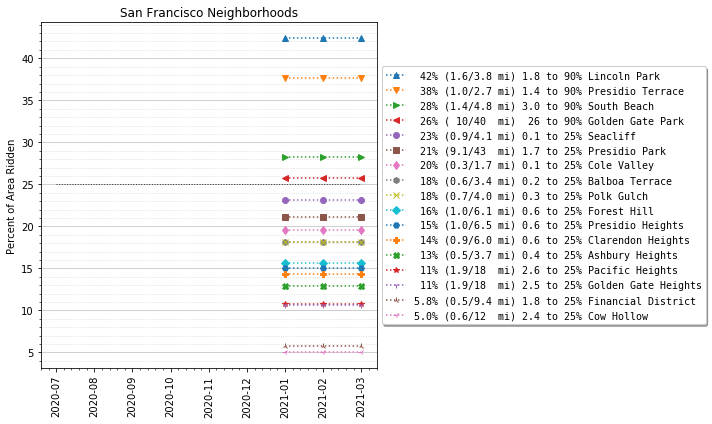

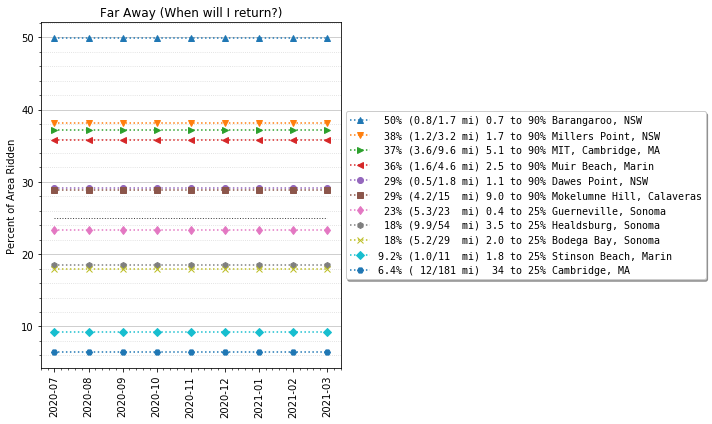

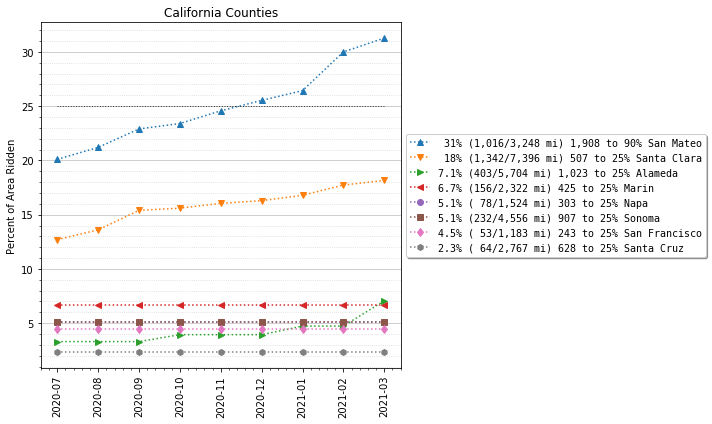

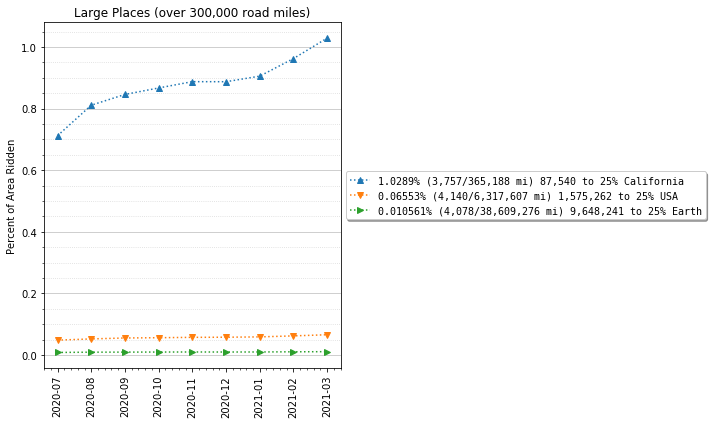

In [1]:
%run BikeCode.ipynb
wandering(places)



# Eddington Number

The  physicist [Sir Arthur Eddington](https://en.wikipedia.org/wiki/Arthur_Eddington), a contemporary of Einstein, was a pre-Strava bicyclist who favored this metric:

> *Your [**Eddington Number**](https://www.triathlete.com/2011/04/training/measuring-bike-miles-eddington-number_301789) is the largest integer **e** such that you have cycled at least**&nbsp;e** miles on at least**&nbsp;e** days.*

I'll look at the **miles** column across all my **rides** to compute my Eddington number:

In [2]:
Ed_number(rides['miles'])

63

**My Eddington Number is 63**: I've ridden at least 63 miles on at least 63 days (but not 64 miles on 64 days). My number is above [the mean for Strava](https://swinny.net/Cycling/-4687-Calculate-your-Eddington-Number), but not nearly as good as Eddington himself: his number was **84** when he died at age 62, and his roads, bicycles, and navigation aids were not nearly as nice as mine, so bravo zulu to him. I don't think I will reach 84, but how many more rides do I need to reach 65? or 70? I'll call the difference the Eddington gap:

In [3]:
{mi: Ed_gap(rides['miles'], mi) 
 for mi in range(64, 71)}

{64: 3, 65: 7, 66: 11, 67: 19, 68: 23, 69: 34, 70: 40}

I need just 7 more rides to reach 65, but 40 to reach 70.

Eddington was English, so he used miles, but we could also consider a **metric Eddington number**:

In [4]:
Ed_number(rides['kms'])

87

In [5]:
{km: Ed_gap(rides['kms'], km) 
 for km in range(88, 101, 2)}

{88: 1, 90: 5, 92: 10, 94: 18, 96: 23, 98: 31, 100: 36}

My **metric Eddington Number is 87**, and my gap to 90 is 5 more rides, and to 100 is 36 more rides.

Here are some properties of Eddington numbers:
- Your Eddington number is monotonic: it can never decrease over time. 
- To improve from an Eddington number of *n* to *n* + 1 can take as few as 1 ride, or as many as *n* + 1 rides.
  + *Suppose I have done 49 rides, each of exactly 50 miles. My Eddington number is 49.*
  + *With one 50 mile ride, my Eddington number becomes 50.*
  + *I would then need 51 new 51+ mile rides to reach 51.*
- Your metric Eddington number will always be greater than or equal to your imperial Eddington number.
- Your metric Eddington number will never be more than 1.609344 times your  imperial Eddington number.
- Of two riders, it is possible that one has a higher metric number and the other a higher imperial number.

Here is my Eddington number progress over the years, in miles and kms:

,year,Ed_km,Ed_mi
0,2013,27,23
1,2014,45,34
2,2015,60,41
3,2016,65,46
4,2017,72,51
5,2018,76,53
6,2019,79,55
7,2020,86,61
8,2021,87,63


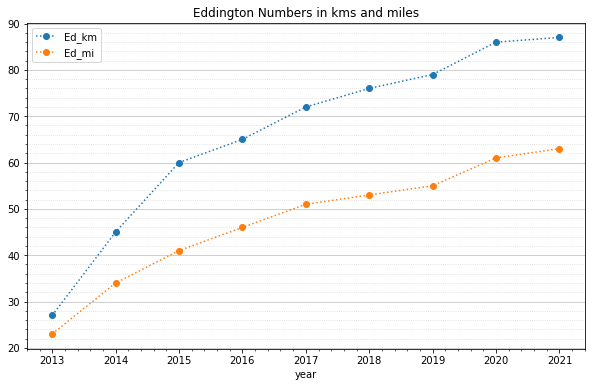

In [6]:
Ed_progress()

*Note:* the definition of Eddington Number seems precise, but what exactly does ***day*** mean? The New Oxford dictionary has three senses:

1. a period of 24 hours; 
2. a unit of time, reckoned from one midnight to the next;
3. the part of a day when it is light. 

I originally assumed sense 2, but I wanted to accept sense 1 for [bikepacking](https://bikepacking.com/) trips where I rode to a camping site in the afternoon, pitched a tent for the night, and rode back home the next morning; what bikepackers call a [sub-24-hour overnight](https://oneofsevenproject.com/s24o-bikepacking-guide/) (S24O).  And then COVID struck, the camping sites closed, so why not allow an S24O ride where I sleep in my own home? I realize Eddington had a lot more hardships than we have (World War I, the 1918 pandemic, and World War II), but I hope he would approve of this modest accomodation on my part.

# Hill-Index: Speed versus Grade on Short Segments

The Eddington number reminds me of the [**h-index**](https://en.wikipedia.org/wiki/H-index) metric for scientific publications. I invented another metric:

> *Your **hill-index** is the maximum integer **h** where you can regularly climb an **h** percent grade at **h** miles per hour.*

I'll plot grade versus speed for segments (not rides) with two best-fit curves: a blue quadratic and an orange cubic. I'll also superimpose a red dotted line where grade = speed.

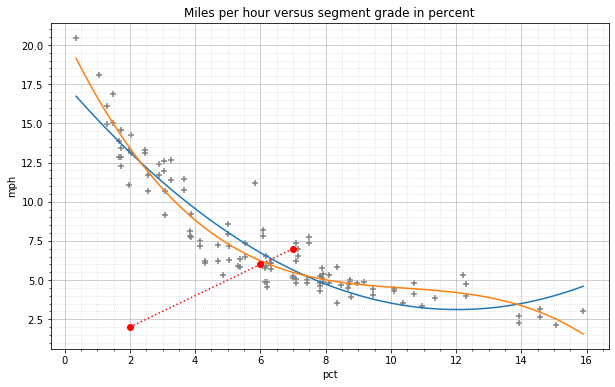

In [7]:
show('pct', 'mph', segments, 'Miles per hour versus segment grade in percent')
plt.plot((2, 6, 7), (2, 6, 7), 'ro:');

Both  best-fit curves are above the red circle at 6% and below the red circle for 7%, so  **my hill-index is 6**. We also see that I can cruise at 15 to 17 mph on a 1% grade, but only about 8 mph at 5% grade, and around 5 mph on 8% grades.

 # Speed versus Grade on Long Rides

The plot above tell me how fast I should expect to climb a particular hill, but what about average time on longer rides? Here's a plot of my speed versus steepness (measured in feet climbed per mile rather than in percent).

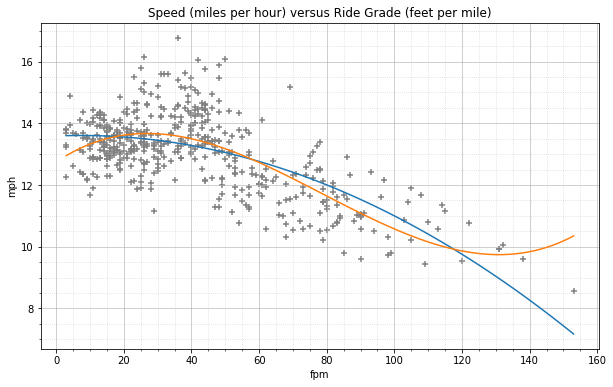

In [8]:
show('fpm', 'mph', rides, 'Speed (miles per hour) versus Ride Grade (feet per mile)')

So, I average a little under 14 mph when the overall route is fairly flat, with a lot of variability from 12 to 16 mph, depending more on my level of effort (and maybe the wind) than on the grade of the road. But when the grade is steeper than 50 ft/mile, my speed falls off quickly: down to 12mph at 80 ft/mile;  11 mph at 100 ft/mile; and around 10 mph at 120 ft/mile. Note that 120 ft/mile is only 2.3% grade, but if you figure a typical route is 1/3 up, 1/3 down, and 1/3 flat, then that's 6.9% average grade on the up part.

I can use this to predict the time of a ride.  For example, if I'm in  La Honda and want to get to Pescadero, which is faster: the [coast route](https://www.google.com/maps/dir/La+Honda,+California/Pescadero,+California/@37.2905834,-122.3896683,12z/data=!4m19!4m18!1m10!1m1!1s0x808faed4dc6265bd:0x51a109d3306a7219!2m2!1d-122.274227!2d37.3190255!3m4!1m2!1d-122.4039496!2d37.3116594!3s0x808f062b7d7585e7:0x942480c22f110b74!1m5!1m1!1s0x808f00b4b613c4c1:0x43c609077878b77!2m2!1d-122.3830152!2d37.2551636!3e1) (15.7 miles, 361 ft climb), or the  [creek route](https://www.google.com/maps/dir/La+Honda,+California/Pescadero,+California/@37.2905834,-122.3896683,12z/data=!4m19!4m18!1m10!1m1!1s0x808faed4dc6265bd:0x51a109d3306a7219!2m2!1d-122.274227!2d37.3190255!3m4!1m2!1d-122.3658887!2d37.2538867!3s0x808f00acf265bd43:0xb7e2a0c9ee355c3a!1m5!1m1!1s0x808f00b4b613c4c1:0x43c609077878b77!2m2!1d-122.3830152!2d37.2551636!3e1) (13.5 miles, 853 ft climb)? We can estimate:

In [9]:
f'Coast: {estimate(15.7, 361):.0f} min, Creek: {estimate(13.5, 853):.0f} min.'

'Coast: 70 min, Creek: 64 min.'

This predicts the shorter but steeper creek route would be about 6 minutes faster (whereas Google Maps predicts the creek route would be 80 minutes, 2 more than the coast route—I guess Google lacks confidence in my climbing ability).  This is all good to know, but other factors (like the scenery and whether I want to stop at the San Gregorio store) are probably more important in making the choice.

# VAM

Climbing speed measured by vertical ascent per hour is known as [VAM](https://en.wikipedia.org/wiki/VAM_%28bicycling%29), which stands for *velocità ascensionale media* (for native Campagnolo speakers) or *mean ascent velocity* (for SRAM) or 平均上昇率 (for Shimano). The theory is that for steepish climbs, most of your power is going into lifting against gravity, so your VAM should be about constant no matter what the grade in that range. (For flatish rides power is spent on wind and rolling resistance, and for the steepest of rides, in my experience,  power goes largely to cursing *sotto voce*, as they say in Italian.) 

Here's a plot of my VAM versus grade over short segments:

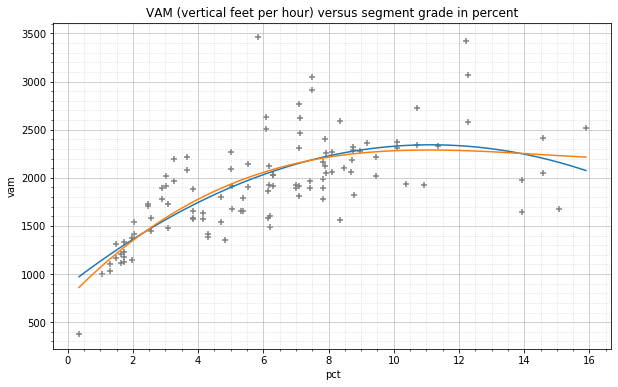

In [10]:
show('pct', 'vam', segments, 'VAM (vertical feet per hour) versus segment grade in percent')

I see a wide spread of VAM numbers; at 7% to 8% I range from 1500 to 3000 ft/hour.  Champion cyclists sprint at over 6000 ft/hour, and can sustain [5400 ft/hour for 7 hours](https://www.strava.com/activities/4996833865]). As we can see in the segments listed below, I can sustain 3000 ft/hour for only a few minutes:

In [11]:
top(segments, 'vam')

,title,hours,miles,feet,mph,vam,fpm,pct,kms
18,Davenport Kicker,0.0214,0.24,74,11.21,3458.0,308.0,5.84,0.39
39,Limantour Spit,0.0886,0.47,303,5.30,3420.0,645.0,12.21,0.76
103,Westridge 3min,0.0781,0.37,240,4.74,3073.0,649.0,12.29,0.60
90,Tunitas flattens,0.0544,0.42,166,7.72,3051.0,395.0,7.49,0.68
91,Tunitas flattens,0.0569,0.42,166,7.38,2917.0,395.0,7.49,0.68
51,Old La Honda Mile 1,0.1339,0.99,370,7.39,2763.0,374.0,7.08,1.59
101,Westridge,0.1411,0.68,385,4.82,2729.0,566.0,10.72,1.09
60,Pomponio Creek,0.0464,0.38,122,8.19,2629.0,321.0,6.08,0.61
49,Old La Honda (Bridge to Stop),0.4783,3.33,1255,6.96,2624.0,377.0,7.14,5.36
80,Stirrup to Moon,0.0614,0.36,159,5.86,2590.0,442.0,8.36,0.58


On segments that are at least a kilometer long my VAM tops out at about 2700 ft/hour:

In [12]:
top(segments[segments['kms'] > 1], 'vam')

,title,hours,miles,feet,mph,vam,fpm,pct,kms
51,Old La Honda Mile 1,0.1339,0.99,370,7.39,2763.0,374.0,7.08,1.59
101,Westridge,0.1411,0.68,385,4.82,2729.0,566.0,10.72,1.09
49,Old La Honda (Bridge to Stop),0.4783,3.33,1255,6.96,2624.0,377.0,7.14,5.36
50,Old La Honda (Bridge to Stop),0.5089,3.33,1255,6.54,2466.0,377.0,7.14,5.36
102,Westridge,0.1644,0.68,385,4.14,2342.0,566.0,10.72,1.09
52,Old La Honda Mile 1,0.1600,0.99,370,6.19,2312.0,374.0,7.08,1.59
16,Canon to No Cycling,0.0872,0.75,198,8.60,2271.0,264.0,5.00,1.21
27,Huddart,0.1708,0.92,385,5.39,2254.0,418.0,7.93,1.48
94,Tunitas steep,0.2708,1.20,599,4.43,2212.0,499.0,9.45,1.93
110,Woodside Climb,0.1347,1.71,295,12.69,2190.0,173.0,3.27,2.75


I can also look at VAM numbers for complete rides. I would expect the ride numbers to be half the segment numbers (or less) since most of my rides are circuits where I return to the start, and thus no more than half the ride is climbing. Sure enough, the best I can do is about 1300 ft/hour:

In [13]:
top(rides, 'vam')

,date,year,title,hours,miles,feet,mph,vam,fpm,pct,kms
218,"Sun, 11/29",2015,Mt. Hamilton,3.6800,37.00,4902,10.05,1332.0,132.0,2.51,59.53
2,"Fri, 4/2",2021,Everesting 5: climb 2×(OLH + WOLH),3.2750,31.48,4344,9.61,1326.0,138.0,2.61,50.65
6,"Mon, 3/29",2021,Everesting 1: Mt Diablo,2.5964,22.22,3406,8.56,1312.0,153.0,2.90,35.75
5,"Tue, 3/30",2021,Everesting 2: Kings + WOLH + OLH,3.3414,35.99,4377,10.77,1310.0,122.0,2.30,57.91
225,"Sat, 11/25",2017,Mt. Hamilton,3.6894,36.65,4806,9.93,1303.0,131.0,2.48,58.97
207,"Sun, 12/1",2013,Mt. Hamilton,3.7836,37.56,4921,9.93,1301.0,131.0,2.48,60.43
185,"Fri, 10/30",2015,OLH / West Alpine,3.4794,39.51,4505,11.36,1295.0,114.0,2.16,63.57
84,"Sat, 4/26",2014,OLH / Tunitas Creek,5.2572,58.69,6742,11.16,1282.0,115.0,2.18,94.43
75,"Sat, 4/18",2015,Tunitas + Lobitos Creeks,5.2439,61.27,6611,11.68,1261.0,108.0,2.04,98.58
59,"Wed, 10/14",2015,Half Moon Bay,6.1319,72.97,7644,11.90,1247.0,105.0,1.98,117.41


# Exploring the Data: `rides` and `segments`

Some more poking around with the data:


In [14]:
rides.describe() # Summary statistics for the rides

,year,hours,miles,feet,mph,vam,fpm,pct,kms
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,2016.462963,3.115474,40.070844,1669.654321,13.033807,512.502058,40.997942,0.776317,64.473909
std,1.904327,1.293698,15.782804,1370.266537,1.282601,295.230078,27.304809,0.517015,25.394528
min,2012.000000,1.540000,20.960000,68.000000,8.560000,33.000000,3.000000,0.050000,33.720000
25%,2015.000000,2.145225,28.092500,666.000000,12.290000,264.750000,19.250000,0.370000,45.202500
50%,2016.000000,2.685950,34.560000,1294.500000,13.220000,495.000000,36.000000,0.680000,55.605000
75%,2018.000000,3.639925,45.502500,2141.250000,13.807500,688.750000,54.000000,1.030000,73.212500
max,2021.000000,8.137500,101.000000,7644.000000,16.770000,1332.000000,153.000000,2.900000,162.510000


In [15]:
segments.describe() # Summary statistics for the segments

,hours,miles,feet,mph,vam,fpm,pct,kms
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,0.165926,1.092411,305.714286,7.598036,1925.205357,332.535714,6.298304,1.757589
std,0.186767,1.045180,317.077688,3.888749,508.502237,184.101663,3.487190,1.681245
min,0.021400,0.130000,35.000000,2.110000,377.000000,18.000000,0.350000,0.210000
25%,0.066100,0.467500,121.250000,4.835000,1583.500000,188.750000,3.570000,0.755000
50%,0.107900,0.770000,196.000000,6.150000,1913.000000,325.000000,6.160000,1.240000
75%,0.181925,1.240000,370.000000,10.712500,2228.500000,431.500000,8.165000,1.992500
max,1.390600,7.380000,1887.000000,20.470000,3458.000000,839.000000,15.890000,11.870000


In [16]:
top(rides, 'mph') # Fastest rides

,date,year,title,hours,miles,feet,mph,vam,fpm,pct,kms
224,"Sun, 5/22",2016,Canada,2.1867,36.68,1332,16.77,609.0,36.0,0.69,59.02
248,"Wed, 9/13",2017,Healdburg / Jimtown,2.1342,34.45,912,16.14,427.0,26.0,0.50,55.43
469,"Sat, 1/25",2014,Woodside,1.5606,25.08,1243,16.07,796.0,50.0,0.94,40.35
478,"Sat, 4/11",2015,Woodside,1.5400,24.73,1035,16.06,672.0,42.0,0.79,39.79
429,"Sun, 1/18",2015,Woodside,1.6378,26.02,1257,15.89,767.0,48.0,0.91,41.87
467,"Fri, 6/24",2016,Foothill Expway,1.5903,25.11,623,15.79,392.0,25.0,0.47,40.40
268,"Sun, 1/26",2014,Canada Rd,2.0997,33.12,1446,15.77,689.0,44.0,0.83,53.29
292,"Sun, 4/12",2015,Palo Alto Cycling,2.0303,31.76,1210,15.64,596.0,38.0,0.72,51.10
134,"Sun, 10/15",2017,Los Gatos,2.8647,44.71,1437,15.61,502.0,32.0,0.61,71.94
391,"Sun, 2/28",2016,Woodside Loop,1.7261,26.93,843,15.60,488.0,31.0,0.59,43.33


In [17]:
top(segments, 'mph') # Fastest segments (there are no descent segments in the database)

,title,hours,miles,feet,mph,vam,fpm,pct,kms
57,PCH Pescadero to Bean Hollow,0.1353,2.77,51,20.47,377.0,18.0,0.35,4.46
23,Highway 1 Cascanoa to Cascade,0.0889,1.61,89,18.11,1001.0,55.0,1.05,2.59
25,Highway 9 Mantalvo,0.0267,0.45,35,16.85,1311.0,78.0,1.47,0.72
96,Vickrey Fruitvale,0.0614,0.99,68,16.12,1107.0,69.0,1.30,1.59
26,Highway 9 Mantalvo,0.0300,0.45,35,15.00,1167.0,78.0,1.47,0.72
97,Vickrey Fruitvale,0.0661,0.99,68,14.98,1029.0,69.0,1.30,1.59
85,The Boneyard,0.1014,1.48,135,14.60,1331.0,91.0,1.73,2.38
69,Sand Hill Alpine to 280,0.1172,1.67,180,14.25,1536.0,108.0,2.04,2.69
12,Canada to College,0.0986,1.37,119,13.89,1207.0,87.0,1.65,2.20
86,The Boneyard,0.1100,1.48,135,13.45,1227.0,91.0,1.73,2.38


In [18]:
top(segments, 'feet') # Biggest climbs

,title,hours,miles,feet,mph,vam,fpm,pct,kms
100,West Alpine full,1.3906,7.38,1887,5.31,1357.0,256.0,4.84,11.87
38,Kings Greer to Skyline,0.8100,3.92,1536,4.84,1896.0,392.0,7.42,6.31
37,Kings Greer to Skyline,0.7814,3.92,1536,5.02,1966.0,392.0,7.42,6.31
49,Old La Honda (Bridge to Stop),0.4783,3.33,1255,6.96,2624.0,377.0,7.14,5.36
50,Old La Honda (Bridge to Stop),0.5089,3.33,1255,6.54,2466.0,377.0,7.14,5.36
0,Alma Mountain Charlie,0.5303,3.12,875,5.88,1650.0,280.0,5.31,5.02
33,Kings half way,0.4572,2.89,820,6.32,1794.0,284.0,5.37,4.65
34,Kings half way,0.4958,2.89,820,5.83,1654.0,284.0,5.37,4.65
6,Alpine Portola to top Joaquin,0.5767,3.52,801,6.10,1389.0,228.0,4.31,5.66
5,Alpine Portola to top Joaquin,0.5661,3.52,801,6.22,1415.0,228.0,4.31,5.66


In [19]:
top(segments, 'pct') # Steepest climbs

,title,hours,miles,feet,mph,vam,fpm,pct,kms
63,Redwood Gulch hits,0.0600,0.18,151,3.00,2517.0,839.0,15.89,0.29
40,Limantour steepest,0.0947,0.20,159,2.11,1679.0,795.0,15.06,0.32
30,Joaquin,0.1242,0.33,254,2.66,2045.0,770.0,14.58,0.53
29,Joaquin,0.1053,0.33,254,3.13,2412.0,770.0,14.58,0.53
79,Stirrup Wall,0.0758,0.17,125,2.24,1649.0,735.0,13.93,0.27
78,Stirrup Wall,0.0631,0.17,125,2.69,1981.0,735.0,13.93,0.27
104,Westridge 3min,0.0931,0.37,240,3.97,2578.0,649.0,12.29,0.60
103,Westridge 3min,0.0781,0.37,240,4.74,3073.0,649.0,12.29,0.60
39,Limantour Spit,0.0886,0.47,303,5.30,3420.0,645.0,12.21,0.76
64,Redwood Gulch wall,0.1108,0.43,258,3.88,2329.0,600.0,11.36,0.69
